## Summary:
    
    -Initialize H2o library
    -Read the data file
    -Split data file into train and test (assert that the data sizes match)
    -Create Model 1 - GBM
    -Create Model 2 - Deep Learning Model
    -Create Model 3 - Random Forest
    -Create Model 4 - Stacked Ensemble
    -Performance Analysis

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.231-b11, mixed mode, sharing)


C:\MachineLearning\anaconda3\envs\tf2-gpu\lib\site-packages\h2o\backend\server.py:385: UserWarning:   You have a 32-bit version of Java. H2O works best with 64-bit Java.
  Please download the latest 64-bit Java SE JDK from Oracle.

  warn("  You have a 32-bit version of Java. H2O works best with 64-bit Java.\n"


  Starting server from C:\MachineLearning\anaconda3\envs\tf2-gpu\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ADITYA~1\AppData\Local\Temp\tmpekfphepr
  JVM stdout: C:\Users\ADITYA~1\AppData\Local\Temp\tmpekfphepr\h2o_Aditya_Jain_started_from_python.out
  JVM stderr: C:\Users\ADITYA~1\AppData\Local\Temp\tmpekfphepr\h2o_Aditya_Jain_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_Aditya_Jain_tcmopd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,247.5 Mb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
data = h2o.import_file('http://coursera.h2o.ai/house_data.3487.csv',
                      destination_frame='housing')

train_valid, test = data.split_frame([0.9], seed=123)
print ('Number of rows train (%d), and test (%d)'%(train_valid.nrows, test.nrows))

assert train_valid.nrows==19462
assert test.nrows==2151

Parse progress: |█████████████████████████████████████████████████████████| 100%
Number of rows train (19462), and test (2151)


In [4]:
data.names

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [5]:
data.summary()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
type,int,enum,int,int,real,int,int,real,int,int,int,int,int,int,int,int,int,real,real,int,int
mins,1000102.0,,75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.1559,-122.519,399.0,651.0
mean,4580301520.864987,,540088.1417665284,3.370841623097218,2.114757321982139,2079.899736269819,15106.96756581695,1.4943089807060526,0.007541757275713691,0.23430342849211097,3.4094295100171164,7.6568731781798105,1788.3906907879518,291.50904548188555,1971.0051357979064,84.4022579003377,98077.93980474674,47.56005251931665,-122.21389640494158,1986.5524915560036,12768.45565169118
maxs,9900000190.0,,7700000.0,33.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.7776,-121.315,6210.0,871200.0
sigma,2876565571.3120522,,367127.19648270035,0.930061831147451,0.7701631572177408,918.4408970468095,41420.51151513551,0.5399888951423489,0.08651719772788766,0.7663175692736117,0.6507430463662044,1.1754587569743344,828.0909776519175,442.57504267746685,29.373410802386235,401.67924001917555,53.50502625747248,0.13856371024192365,0.14082834238139275,685.3913042527788,27304.179631338524
zeros,0,,0,13,10,0,0,0,21450,19489,0,0,0,13126,0,20699,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,7129300520.0,20141013T000000,221900.0,3.0,1.0,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6414100192.0,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.721,-122.319,1690.0,7639.0
2,5631500400.0,20150225T000000,180000.0,2.0,1.0,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0


In [6]:
#what we want to predict
y = 'price'

#fields which we may not have while doing prediction.
ignoreFields = ["id"]

#all fields minus those which we would not have during predictions
xAll = [i for i in train_valid.names if i not in ignoreFields]

In [7]:
#split train data further into train and validation
train, valid = train_valid.split_frame(ratios=[0.9])

print ('Number of rows train (%d), valid (%d) and test (%d)'%(train.nrows, valid.nrows, test.nrows))

Number of rows train (17522), valid (1940) and test (2151)


### Model 1 -> GBM Model

In [8]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

gbm_model = H2OGradientBoostingEstimator(model_id='price_model_gbm') 
gbm_model.train(xAll,y,train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


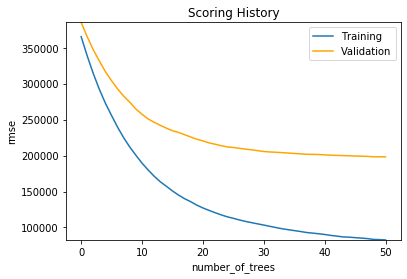


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 26489242281.479588
RMSE: 162755.1605371688
MAE: 85477.33154871502
RMSLE: 0.2013496297466987
Mean Residual Deviance: 26489242281.479588


In [9]:
gbm_model.plot()
gbm_model.model_performance(test)

### Model 2 -> Deep Learning Model

 - We see that when we change the distribution to 'laplace' the value of mae drops.
 - this is partly because the target variable has a long tail - decays expotentially

In [10]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

dl_model = H2ODeepLearningEstimator(model_id='price_model_dl',
                                    stopping_rounds=3,
                                    stopping_tolerance=0,
                                    stopping_metric='deviance',
                                    epochs=8,
                                    distribution='laplace') 
dl_model.train(xAll,y,train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


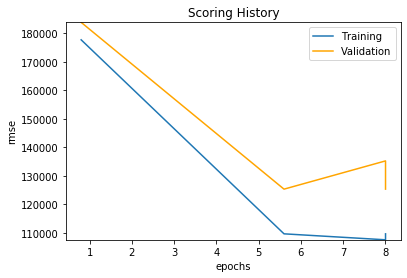


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 13347022122.326408
RMSE: 115529.31282720593
MAE: 67933.92075680463
RMSLE: 0.17310218041143988
Mean Residual Deviance: 67933.92075680463


In [11]:
dl_model.plot()
dl_model.model_performance(test)

### Model 3 - RandomForest

In [12]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

rf_model = H2ORandomForestEstimator(model_id='price_model_rf',
                                   balance_classes=True,
                                   ntrees=50)
rf_model.train(xAll,y,train, validation_frame=valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


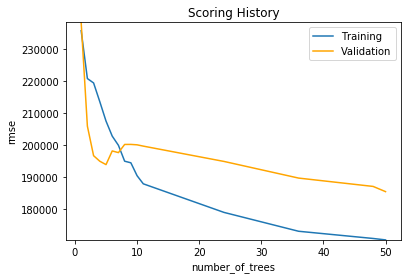


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 27339143813.679924
RMSE: 165345.52855665595
MAE: 85533.0960989076
RMSLE: 0.20076970722646664
Mean Residual Deviance: 27339143813.679924


In [13]:
rf_model.plot()
rf_model.model_performance(test)

### Model 3 - Stacked Ensemble

    - RMSE of the Stacked Ensemble Model comes at 115777.34 which is lower than the desired target

In [14]:
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

ind_models = [gbm_model.model_id, dl_model.model_id, rf_model.model_id]

stacked_model = H2OStackedEnsembleEstimator(model_id='price_model_ensemble', base_models=ind_models)
stacked_model.train(xAll, y, train, valid)

stackedensemble Model Build progress: |███████████████████████████████████| 100%


In [15]:
stacked_model.model_performance(test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 13404394071.970106
RMSE: 115777.34697241125
MAE: 68355.57419360787
RMSLE: 0.1717121580356489
R^2: 0.8991620678141388
Mean Residual Deviance: 13404394071.970106
Null degrees of freedom: 2150
Residual degrees of freedom: 2148
Null deviance: 285999925849289.9
Residual deviance: 28832851648807.7
AIC: 56271.11649108647


### Analysing Performance

In [16]:
import pandas as pd
import numpy as np

model_names = ['GBM', 'Deep Learning', 'Random Forest','Ensemble']
all_models = [gbm_model, dl_model, rf_model, stacked_model]

test_performances = list(map(lambda x: x.model_performance(test), all_models))

In [17]:
# looking mae
pd.Series(map((lambda x: x.mae()), test_performances), model_names)

GBM              85477.331549
Deep Learning    67933.920757
Random Forest    85533.096099
Ensemble         68355.574194
dtype: float64

In [18]:
# looking rmse
pd.Series(map((lambda x: x.rmse()), test_performances), model_names)

GBM              162755.160537
Deep Learning    115529.312827
Random Forest    165345.528557
Ensemble         115777.346972
dtype: float64

In [19]:
# looking mse
pd.Series(map((lambda x: x.mse()), test_performances), model_names)

GBM              2.648924e+10
Deep Learning    1.334702e+10
Random Forest    2.733914e+10
Ensemble         1.340439e+10
dtype: float64

# Conclusion

    - We see that the stacked ensemble model produces an RMSE of 115777.346972 which is less than the desired target value

In [20]:
h2o.save_model(stacked_model,'price-prediction')

'C:\\MachineLearning\\repos\\personel\\h2o\\projects\\price-prediction\\price_model_ensemble'